# Distribution of SEC filings
<ul>
    <li> 10-K: annual report
    <li> 10-Q: quarterly report
    <li> 8-K: current report
    <li> S-4: filing for material information related to M&A
    <li> S-1: registration statement
    <li> S-3: registration statement
    <li> F-1: registration statement by foreign firms
    <li> F-3: registration statement by foreign firms
    <li> 424BX: supplementary prospctus
</ul>

Source link: https://www.sec.gov/dera/data/dera_edgarfilingcounts

In [1]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

url_csv= r"https://www.sec.gov/files/dera/data/number-edgar-filings-form-type/filings_type_year_0921.csv"
response= requests.get(url_csv)
content= response.text
df= pd.read_csv(io.StringIO(content), lineterminator='\n')
df = df.pivot(index='Year', columns='Type', values='Count')
df= df.loc[2000:2021]
df.head()

Type,1,1-A,1-A POS,1-A-W,1-A-W/A,1-A/A,1-E,1-E AD,1-E/A,1-K,...,U5B,U5B/A,U5S,U5S/A,UNDER,UNDER/A,UPLOAD,WDL-REQ,X-17A-5,X-17A-5/A
Year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,18.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,3.0,20.0,1.0,7.0,1.0,NaN,NaN,7.0,2.0
2002,6.0,23.0,NaN,NaN,NaN,100.0,5.0,NaN,NaN,NaN,...,5.0,2.0,26.0,12.0,7.0,NaN,NaN,5.0,5538.0,337.0
2003,1.0,34.0,NaN,NaN,NaN,54.0,11.0,NaN,3.0,NaN,...,NaN,2.0,27.0,9.0,4.0,NaN,NaN,8.0,5410.0,284.0
2004,4.0,21.0,NaN,NaN,NaN,67.0,42.0,NaN,12.0,NaN,...,3.0,1.0,29.0,10.0,2.0,NaN,639.0,2.0,5281.0,477.0


## Display all filing types

In [15]:
print(f"Total number of filing types: {len(df.columns)}")
print("---------------------------------------")
for idx, col in enumerate(df.columns):
    if col.startswith(r'S-1'):
        print(idx, col)
    if col.startswith('S-3'):
        print(idx, col)        

Total number of filing types: 708
---------------------------------------
576 S-1
577 S-1/A
578 S-11
579 S-11/A
580 S-11MEF
581 S-1MEF
587 S-3
588 S-3/A
589 S-3ASR
590 S-3D
591 S-3D/A
592 S-3DPOS
593 S-3MEF


## Distribution

### 10-K (annual report) and 10-Q (quarterly report)

In [3]:
figsize=(16,8)

<AxesSubplot:xlabel='Year'>

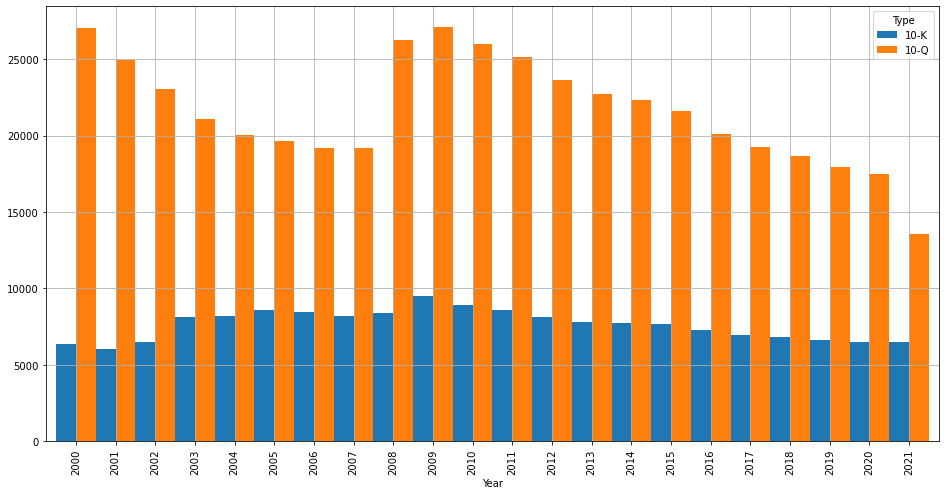

In [4]:
df[['10-K', '10-Q']].plot(kind='bar', figsize= figsize, grid= True, width=1)

### 8-K filings (current reports)

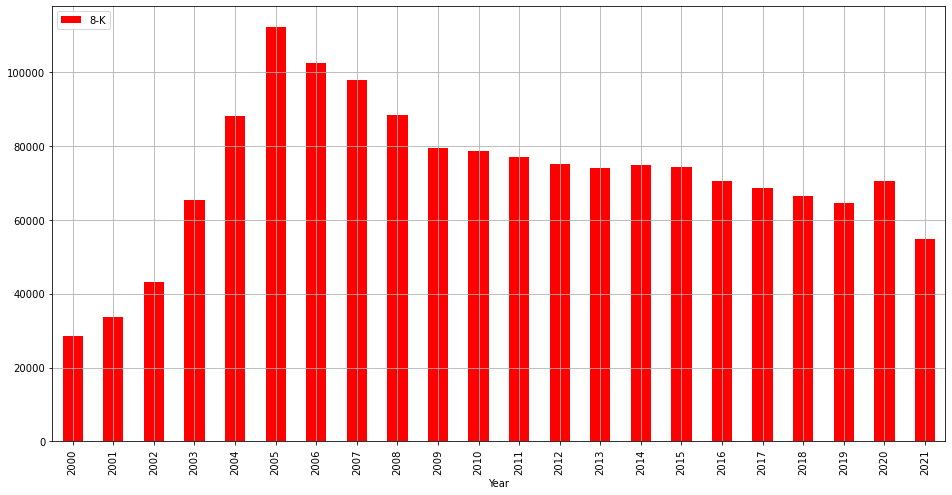

In [5]:
df[['8-K']].plot(kind= 'bar', figsize= figsize, grid=True, color= 'red').legend(loc='upper left')

### S-4 filings (material information related to M&A)

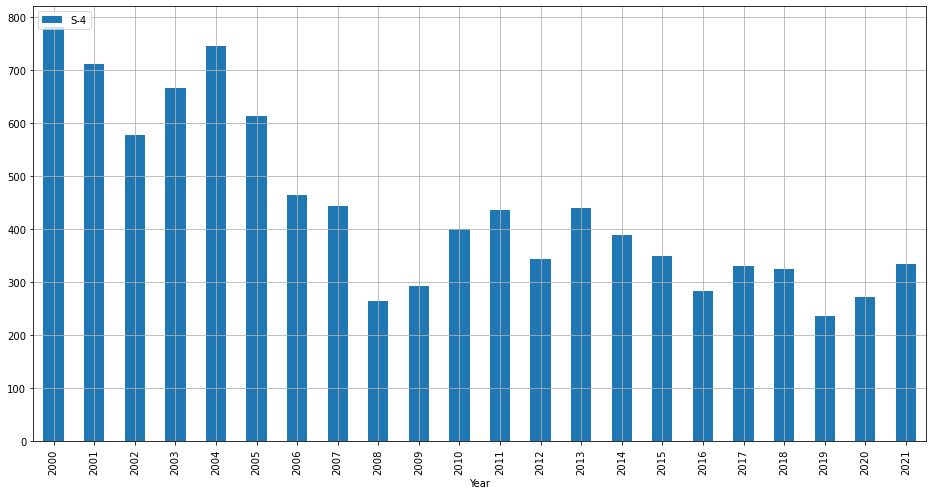

In [6]:
df[['S-4']].plot(kind= 'bar', figsize= figsize, grid=True).legend(loc='upper left')

### S-1 and S-3 filings (registration statements)

<AxesSubplot:xlabel='Year'>

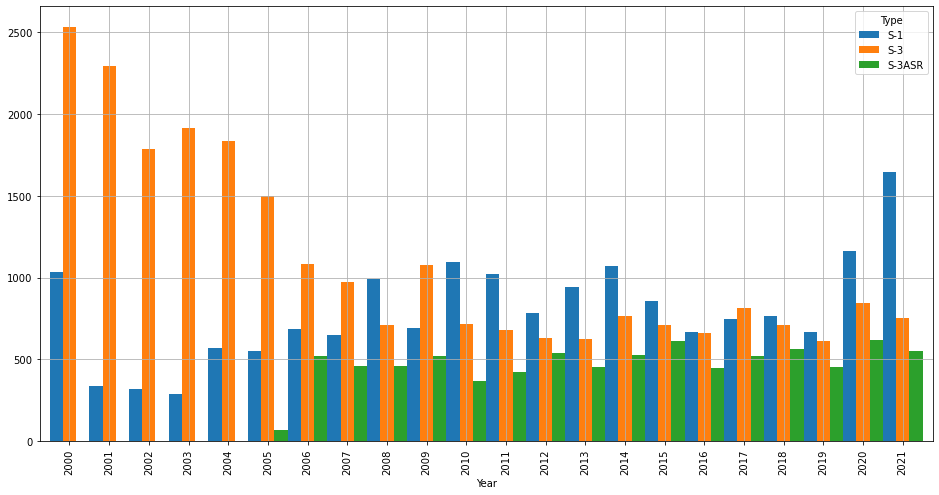

In [16]:
df[['S-1', 'S-3', 'S-3ASR']].plot(kind='bar', figsize= figsize, grid= True, width=1)

### S-8 filings (registration statements)

<AxesSubplot:xlabel='Year'>

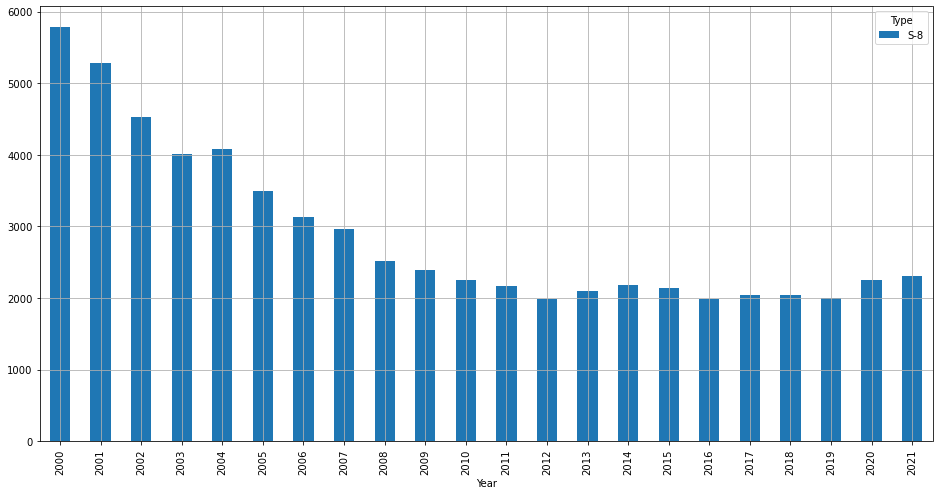

In [17]:
df[['S-8']].plot(kind='bar', figsize= figsize, grid= True)

### F-1 and F-3 filings (registration statements by foreign issuers)

<AxesSubplot:xlabel='Year'>

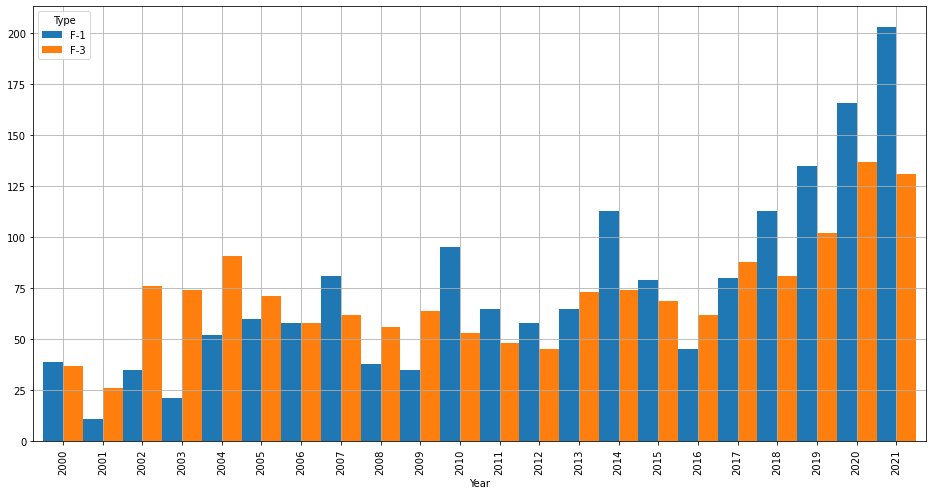

In [18]:
df[['F-1', 'F-3']].plot(kind='bar', figsize= figsize, grid= True, width=1)

### 424BX supplementary prospectus

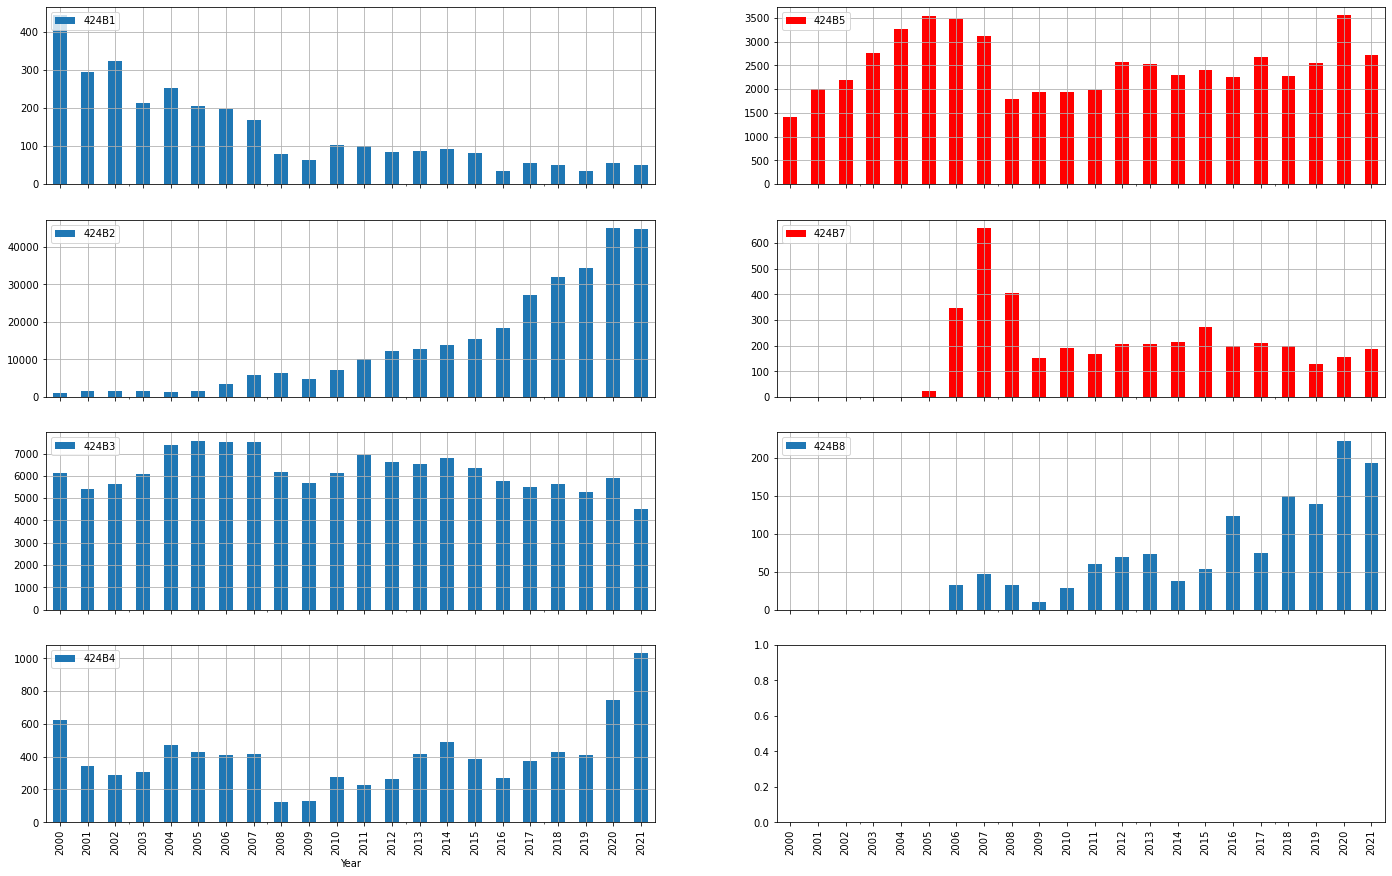

In [27]:
figure, axes= plt.subplots(4,2, sharex=True, figsize= (24,15))
plt.xticks(rotation=90)
df[['424B1']].plot(kind= 'bar', ax= axes[0,0], grid=True).legend(loc='upper left')
df[['424B2']].plot(kind= 'bar', ax= axes[1,0], grid=True).legend(loc='upper left')
df[['424B3']].plot(kind= 'bar', ax= axes[2,0], grid=True).legend(loc='upper left')
df[['424B4']].plot(kind= 'bar', ax= axes[3,0], grid=True).legend(loc='upper left')
df[['424B5']].plot(kind= 'bar', ax= axes[0,1], grid=True, color='red').legend(loc='upper left')
df[['424B7']].plot(kind= 'bar', ax= axes[1,1], grid=True, color='red').legend(loc='upper left')
df[['424B8']].plot(kind= 'bar', ax= axes[2,1], grid=True).legend(loc='upper left')